## Classification

Classification is a supervised learning task where the goal is to predict a category (label) for a given input. Unlike regression, where the output is continuous, classification models predict a discrete label (category).

### Common Types of Classification Algorithms:
1. **Logistic Regression**: Used for binary classification tasks, like predicting whether a student passes or fails based on study hours.
2. **k-Nearest Neighbors (k-NN)**: A non-parametric method used for classification based on proximity to the nearest neighbors.
3. **Decision Trees**: A tree-based model where decisions are made at each node based on feature values.
4. **Random Forests**: An ensemble method combining multiple decision trees to improve classification accuracy.

We will start with Logistic Regression and k-NN examples.
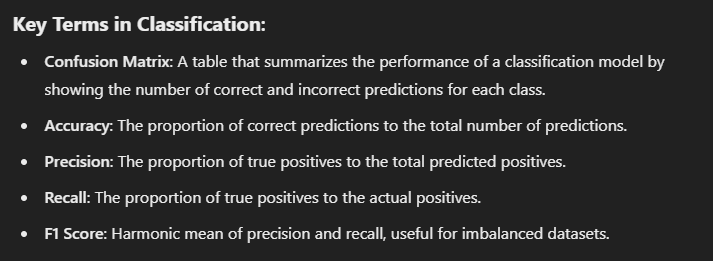

## Classification

Classification is the task of predicting a label or class for a given input. It is a core task in supervised learning, where the goal is to learn from labeled data to classify unseen data into the correct category.

### Popular Algorithms:
- Logistic Regression
- k-Nearest Neighbors (k-NN)
- Decision Trees
- Random Forests

We'll explore logistic regression and k-NN in the following code examples.


Logistic Regression for Binary Classification

Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[11  0]
 [ 0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



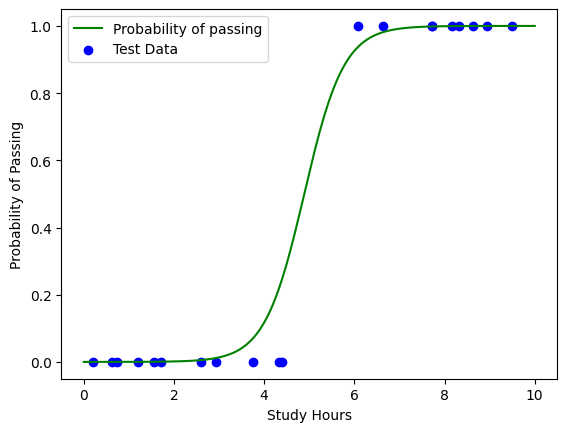

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generating synthetic data for logistic regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Study hours between 0 and 10
y = (X > 5).astype(int).ravel()  # Label 1 if study hours > 5, else 0 (pass/fail)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the decision boundary
X_new = np.linspace(0, 10, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)[:, 1]

plt.plot(X_new, y_prob, "g-", label="Probability of passing")
plt.scatter(X_test, y_test, c="blue", label="Test Data")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()


### Logistic Regression Results:

- **Accuracy**: The proportion of correct predictions over the total predictions.
- **Confusion Matrix**: This shows the number of true positives, true negatives, false positives, and false negatives.
- **Classification Report**: Provides metrics like precision, recall, and F1 score, which are important for understanding model performance, especially on imbalanced datasets.

In this example, logistic regression is used to classify whether a student will pass based on their study hours. The decision boundary visualizes how the probability of passing changes with study hours.


k-Nearest Neighbors (k-NN) Classification

k-NN Accuracy: 1.0
Confusion Matrix:
 [[11  0]
 [ 0  9]]


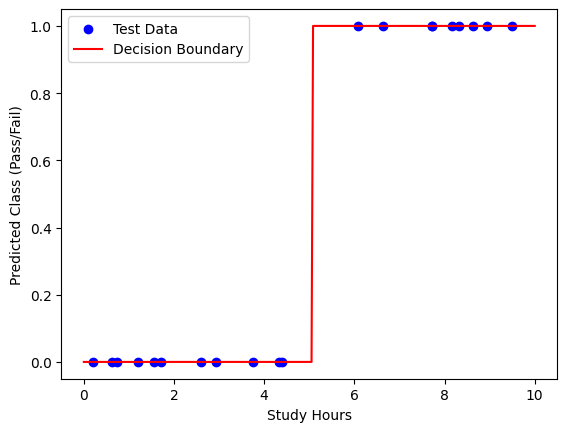

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Generating synthetic data for k-NN
np.random.seed(42)
X_knn = np.random.rand(100, 1) * 10  # Study hours between 0 and 10
y_knn = (X_knn > 5).astype(int).ravel()  # Label 1 if study hours > 5, else 0 (pass/fail)

# Splitting the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Creating the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, y_train_knn)

# Making predictions
y_pred_knn = knn.predict(X_test_knn)

# Evaluating the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)

print("k-NN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

# Visualizing the decision boundary
X_new_knn = np.linspace(0, 10, 300).reshape(-1, 1)
y_prob_knn = knn.predict(X_new_knn)

plt.scatter(X_test_knn, y_test_knn, c="blue", label="Test Data")
plt.plot(X_new_knn, y_prob_knn, "r-", label="Decision Boundary")
plt.xlabel("Study Hours")
plt.ylabel("Predicted Class (Pass/Fail)")
plt.legend()
plt.show()


### k-Nearest Neighbors (k-NN) Results:

- **Accuracy**: The percentage of correct predictions made by the k-NN classifier.
- **Confusion Matrix**: A summary of the correct and incorrect predictions by the model.

The k-NN classifier uses the 3 nearest neighbors to classify whether a student will pass or fail based on study hours. The decision boundary is less smooth than logistic regression, which shows the non-parametric nature of k-NN.
